# Import the necessary libraires

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# 2.image pre processing

In [2]:
#1.import image data generator
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#2.Configure the image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d saumyamohandas/animal-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [12]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'/content/animals/animals',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/animals/animals',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 5400 images belonging to 90 classes.
Found 5400 images belonging to 90 classes.


In [13]:
print(x_train.class_indices)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


print(x_test.class_indices)

# Model building

In [14]:
#2.initializing the model
model=Sequential()

In [15]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))


In [16]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#add flatten layer
model.add(Flatten())

In [18]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))


In [19]:
#output layer
model.add(Dense(units=4,activation="softmax"))

In [20]:
#Complie the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")


In [21]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=len(x_train),epochs=5,validation_data=x_test,validation_steps=10)


Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
______________________________________________

In [ ]:
#save the model
model.save("animal1_class.h5")

# testing the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model=load_model(r"/content/animal1_class.h5",compile=False)

In [ ]:
img=image.load_img(r"/content/dataset/Testing/elephants/Z (1).jpeg",target_size=(64,64))

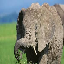

In [ ]:
img

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [106., 152., 202.],
        [104., 150., 200.],
        [103., 149., 199.]],

       [[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [110., 150., 199.],
        [110., 148., 197.],
        [106., 146., 195.]],

       [[119., 160., 204.],
        [121., 162., 206.],
        [123., 164., 208.],
        ...,
        [112., 150., 199.],
        [111., 147., 195.],
        [108., 144., 192.]],

       ...,

       [[108., 148.,  75.],
        [105., 145.,  72.],
        [111., 151.,  78.],
        ...,
        [110., 150.,  79.],
        [110., 151.,  75.],
        [112., 153.,  75.]],

       [[100., 140.,  67.],
        [ 96., 136.,  63.],
        [107., 147.,  74.],
        ...,
        [107., 144.,  74.],
        [113., 151.,  78.],
        [112., 150.,  75.]],

       [[102., 142.,  71.],
        [ 98., 138.,  67.],
        [105., 1

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred = np.argmax(model.predict(x)) # predicting the higher probability index
index = ['bears','crows','elephants','rats']
pred

1/1 [==============================] - 0s 30ms/step


2

In [ ]:
index[pred]

'elephants'